In [1]:
import rpy2

In [2]:
%load_ext rpy2.ipython

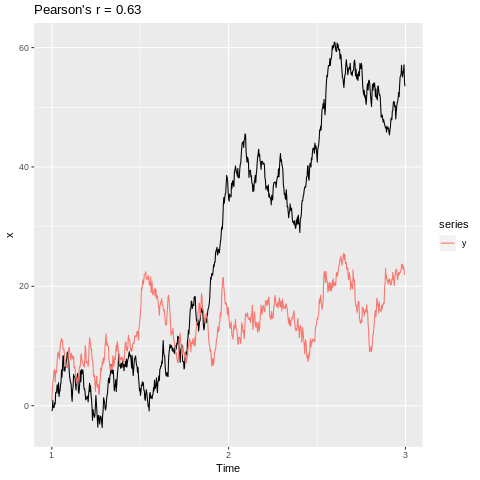

In [44]:
%%R

library(lmtest)
library(ggplot2)
library(forecast)
library(gridExtra)


set.seed(2)

n <- 730

x <- ts(cumsum(rnorm(n)), frequency=365)
y <- ts(cumsum(rnorm(n)), frequency=365)

autoplot(x) + autolayer(y) + ggtitle(paste('Pearson\'s r =', round(cor(x, y), 2)))


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.0892 -2.6305 -0.6122  2.3054 12.5622 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 9.556427   0.248480   38.46   <2e-16 ***
x           0.159580   0.007358   21.69   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.062 on 728 degrees of freedom
Multiple R-squared:  0.3925,	Adjusted R-squared:  0.3917 
F-statistic: 470.4 on 1 and 728 DF,  p-value: < 2.2e-16



t test of coefficients:

             Estimate Std. Error t value  Pr(>|t|)    
(Intercept) 9.5564266  0.2484802  38.459 < 2.2e-16 ***
x           0.1595798  0.0073577  21.689 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


	Breusch-Godfrey test for serial correlation of order up to 10

data:  Residuals
LM test = 682.02, df = 10, p-value < 2.2e-16



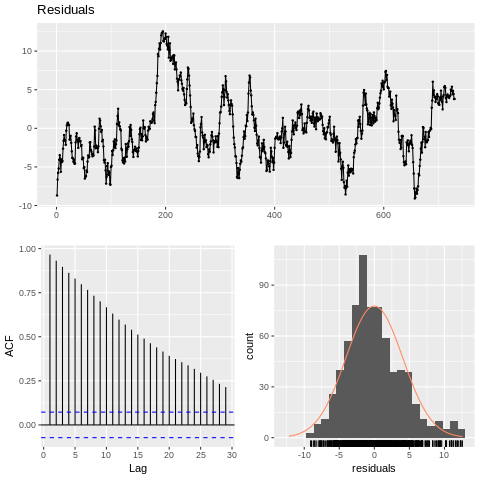

In [45]:
%%R

naive_fit <- lm(y ~ x)
print(summary(naive_fit))
cat('\n')
print(coeftest(naive_fit))
checkresiduals(naive_fit)

Series: y 
Regression with ARIMA(2,0,0) errors 

Coefficients:
         ar1      ar2  intercept    xreg
      1.0209  -0.0355    13.4770  0.0015
s.e.  0.0371   0.0373     2.4887  0.0381

sigma^2 estimated as 0.9669:  log likelihood=-1023.32
AIC=2056.63   AICc=2056.72   BIC=2079.6

Training set error measures:
                     ME      RMSE       MAE        MPE     MAPE      MASE
Training set 0.02961605 0.9806058 0.7748471 -0.7651908 7.215653 0.1306366
                    ACF1
Training set -0.01206311
                     ME      RMSE       MAE        MPE     MAPE      MASE
Training set 0.02961605 0.9806058 0.7748471 -0.7651908 7.215653 0.1306366
                    ACF1
Training set -0.01206311


z test of coefficients:

            Estimate Std. Error z value  Pr(>|z|)    
ar1        1.0209227  0.0371077 27.5124 < 2.2e-16 ***
ar2       -0.0355214  0.0372856 -0.9527    0.3407    
intercept 13.4769668  2.4886709  5.4153 6.118e-08 ***
xreg       0.0015017  0.0381476  0.0394    0.9686 

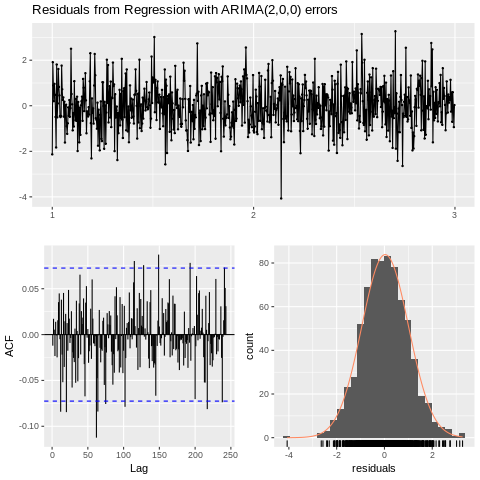

In [46]:
%%R

dynamic_fit <- auto.arima(y, xreg=x, seasonal=TRUE)
print(summary(dynamic_fit))
cat('\n')
print(coeftest(dynamic_fit))
checkresiduals(dynamic_fit)